<>:130: SyntaxWarning: invalid escape sequence '\e'
<>:137: SyntaxWarning: invalid escape sequence '\e'
<>:139: SyntaxWarning: invalid escape sequence '\>'
<>:140: SyntaxWarning: invalid escape sequence '\e'
<>:130: SyntaxWarning: invalid escape sequence '\e'
<>:137: SyntaxWarning: invalid escape sequence '\e'
<>:139: SyntaxWarning: invalid escape sequence '\>'
<>:140: SyntaxWarning: invalid escape sequence '\e'
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1951/142217278.py:130: SyntaxWarning: invalid escape sequence '\e'
  plt.errorbar(pT_values1,yield_values1,yerr=[upperuncertainty_values_1[:],loweruncertainty_values_1[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Inclusive spectrum \n $dN_{{ch}}/d\eta={dNdEta:.3f}$", color="black")
/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1951/142217278.py:137: SyntaxWarning: invalid escape sequence '\e'
  plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
/var/folders/mb/30

(40,)
(40,)


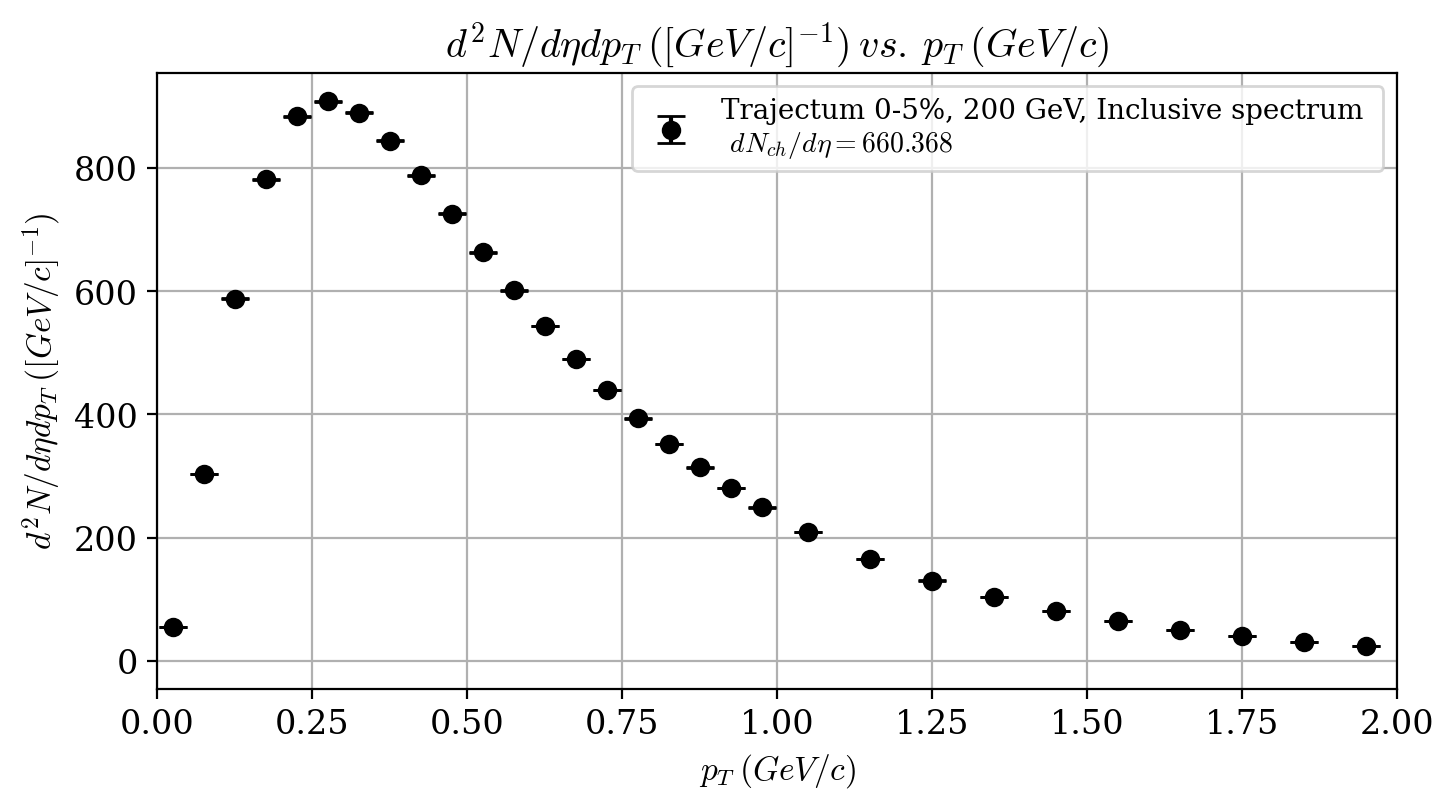

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

#filepath = "/Users/christianschmidt/Desktop/trajectum-2.1/src/10k_AuAu_200GeV_NewNorm.h5"
filepath = "/Users/christianschmidt/Desktop/trajectum-2.1/src/40k_200GeV_AuAu.h5"
datasetname = "multiplicitychargedptbinned/STARTPC/centralitybinned/values"
pion_datasetname = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/values"
kaon_datasetname = "multiplicitychargedkaonptbinned/STARTPC/centralitybinned/values"
proton_datasetname = "multiplicityprotonptbinned/STARTPC/centralitybinned/values"
pion_meanptdataset = "meanptchargedpion/STARTPC/centralitybinned/values"
kaon_meanptdataset = "meanptchargedkaon/STARTPC/centralitybinned/values"
proton_meanptdataset = "meanptproton/STARTPC/centralitybinned/values"
proton_meanpt_uerr_dataset = "meanptproton/STARTPC/centralitybinned/uppererrors"
proton_meanpt_lerr_dataset = "meanptproton/STARTPC/centralitybinned/lowererrors"
kaon_meanpt_uerr_dataset = "meanptchargedkaon/STARTPC/centralitybinned/uppererrors"
kaon_meanpt_lerr_dataset = "meanptchargedkaon/STARTPC/centralitybinned/lowererrors"
pion_meanpt_uerr_dataset = "meanptchargedpion/STARTPC/centralitybinned/uppererrors"
pion_meanpt_lerr_dataset = "meanptchargedpion/STARTPC/centralitybinned/lowererrors"
bin_values1 = "multiplicitychargedptbinned/STARTPC/centralitybinned/bin"
upperuncertainty1 = "multiplicitychargedptbinned/STARTPC/centralitybinned/uppererrors"
loweruncertainty1 = "multiplicitychargedptbinned/STARTPC/centralitybinned/lowererrors"
bin_values2 = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/bin"
upperuncertainty2 = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/uppererrors"
loweruncertainty2 = "multiplicitychargedpionptbinned/STARTPC/centralitybinned/lowererrors"
bin_values3 = "multiplicitykaonptbinned/STARTPC/centralitybinned/bin"
upperuncertainty3 = "multiplicitykaonptbinned/STARTPC/centralitybinned/uppererrors"
loweruncertainty3 = "multiplicitykaonptbinned/STARTPC/centralitybinned/lowererrors"
bin_values4 = "multiplicityprotonptbinned/STARTPC/centralitybinned/bin"
upperuncertainty4 = "multiplicityprotonptbinned/STARTPC/centralitybinned/uppererrors"
loweruncertainty4 = "multiplicityprotonptbinned/STARTPC/centralitybinned/lowererrors"
#centralitydir = "multiplicitychargedptbinned/STARTPC/centralitybinned/centrality"

with h5py.File(filepath, "r") as hdf:
    if datasetname in hdf:
        data1 = hdf[datasetname][:]
        xdata1 = hdf[bin_values1][:]
        usigdata1=hdf[upperuncertainty1][:]
        lsigdata1=hdf[loweruncertainty1][:]
        data2 = hdf[pion_datasetname][:]
        xdata2 = hdf[bin_values2][:]
        usigdata2=hdf[upperuncertainty2][:]
        lsigdata2=hdf[loweruncertainty2][:]
        data3 = hdf[kaon_datasetname][:]
        xdata3 = hdf[bin_values3][:]
        usigdata3=hdf[upperuncertainty3][:]
        lsigdata3=hdf[loweruncertainty3][:]
        data4 = hdf[proton_datasetname][:]
        xdata4 = hdf[bin_values4][:]
        usigdata4=hdf[upperuncertainty4][:]
        lsigdata4=hdf[loweruncertainty4][:]
        pi_meanpt = hdf[pion_meanptdataset][:]
        k_meanpt = hdf[kaon_meanptdataset][:]
        p_meanpt = hdf[proton_meanptdataset][:]
        pi_usigdata = hdf[pion_meanpt_uerr_dataset][:]
        pi_lsigdata = hdf[pion_meanpt_lerr_dataset][:]
        k_usigdata = hdf[kaon_meanpt_uerr_dataset][:]
        k_lsigdata = hdf[kaon_meanpt_lerr_dataset][:]
        p_usigdata = hdf[proton_meanpt_uerr_dataset][:]
        p_lsigdata = hdf[proton_meanpt_lerr_dataset][:]

        #centrality=hdf[centralitydir][:]
    else:
        print(f"Dataset '{datasetname}' not found.")
        exit()

#0-5%: index 20
#5-10%: index 21
#10-20%: index 33
#20-30%: index 34

#centrality_values = centrality[:,0,0]
index = 20
yield_values1 = data1[index,0,:]
yield_values2 = data2[index,0,:]
yield_values3 = data3[index,0,:]
yield_values4 = data4[index,0,:]
yield_PKP = yield_values4+yield_values3+yield_values2
if index == 20:
    centrality_label = "0-5%"
elif index == 21:
    centrality_label = "5-10%"
elif index == 33:
    centrality_label = "10-20%"
elif index == 34:
    centrality_label = "20-30%"

#use this for data off of Carya/PhysGPU
pT_values1 = xdata1
pT_values2 = xdata2
pT_values3 = xdata3
pT_values4 = xdata4

#use this for data off of local
#pT_values = xdata1[index,0,:]


upperuncertainty_values_1 = np.abs(usigdata1[index,0,:])
loweruncertainty_values_1 = np.abs(lsigdata1[index,0,:])

upperuncertainty_values_2 = np.abs(usigdata2[index,0,:])
loweruncertainty_values_2 = np.abs(lsigdata2[index,0,:])
pion_yield_symerr = 0.5*(upperuncertainty_values_2+loweruncertainty_values_2)

upperuncertainty_values_3 = np.abs(usigdata3[index,0,:])
loweruncertainty_values_3 = np.abs(lsigdata3[index,0,:])
kaon_yield_symerr = 0.5*(upperuncertainty_values_3+loweruncertainty_values_3)

upperuncertainty_values_4 = np.abs(usigdata4[index,0,:])
loweruncertainty_values_4 = np.abs(lsigdata4[index,0,:])
proton_yield_symerr = 0.5*(upperuncertainty_values_4+loweruncertainty_values_4)

PKP_error = np.sqrt(pion_yield_symerr**2 + kaon_yield_symerr**2 + proton_yield_symerr**2)

print(pT_values1.shape)
#print(centrality_values)
print(yield_values1.shape)

#array of differences between consecutive pT values
bin_widths1=np.diff(pT_values1)
#sums the bin widths by the yield values EXCEPT the negligable final point (so that the indices are the same)
dNdEta = np.sum(bin_widths1*yield_values1[:-1])

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 4), dpi=200)

plt.errorbar(pT_values1,yield_values1,yerr=[upperuncertainty_values_1[:],loweruncertainty_values_1[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Inclusive spectrum \n $dN_{{ch}}/d\eta={dNdEta:.3f}$", color="black")
#plt.errorbar(pT_values2,yield_values2,yerr=[upperuncertainty_values_2[:],loweruncertainty_values_2[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Pion spectrum", color="red")
#plt.errorbar(pT_values3,yield_values3,yerr=[upperuncertainty_values_3[:],loweruncertainty_values_3[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Kaon spectrum", color="green")
#plt.errorbar(pT_values4,yield_values4,yerr=[upperuncertainty_values_4[:],loweruncertainty_values_4[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Proton spectrum", color="blue")
#plt.errorbar(pT_values4,yield_PKP,yerr=PKP_error, fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, PKP spectrum \n $dN_{{ch, PKP}}/d\eta={dNdEtaPKP:.3f}$", color="purple")
#plt.scatter(pT_values,yield_values)
plt.legend(prop={'size': '10'})
plt.title("$d^2N/d\eta dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/d\eta dp_T\>([GeV/c]^{-1})$")
#plt.yscale("log")
plt.grid()
plt.show()

In [38]:
print(f"This is a test: {float(pi_meanpt[20])}")

This is a test: 0.4825300629805152


/var/folders/mb/30yyqfg516jdbq01t3whp1r40000gn/T/ipykernel_1113/1296752277.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"This is a test: {float(pi_meanpt[20])}")


<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:27: SyntaxWarning: invalid escape sequence '\p'
<>:28: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:34: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:37: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid e

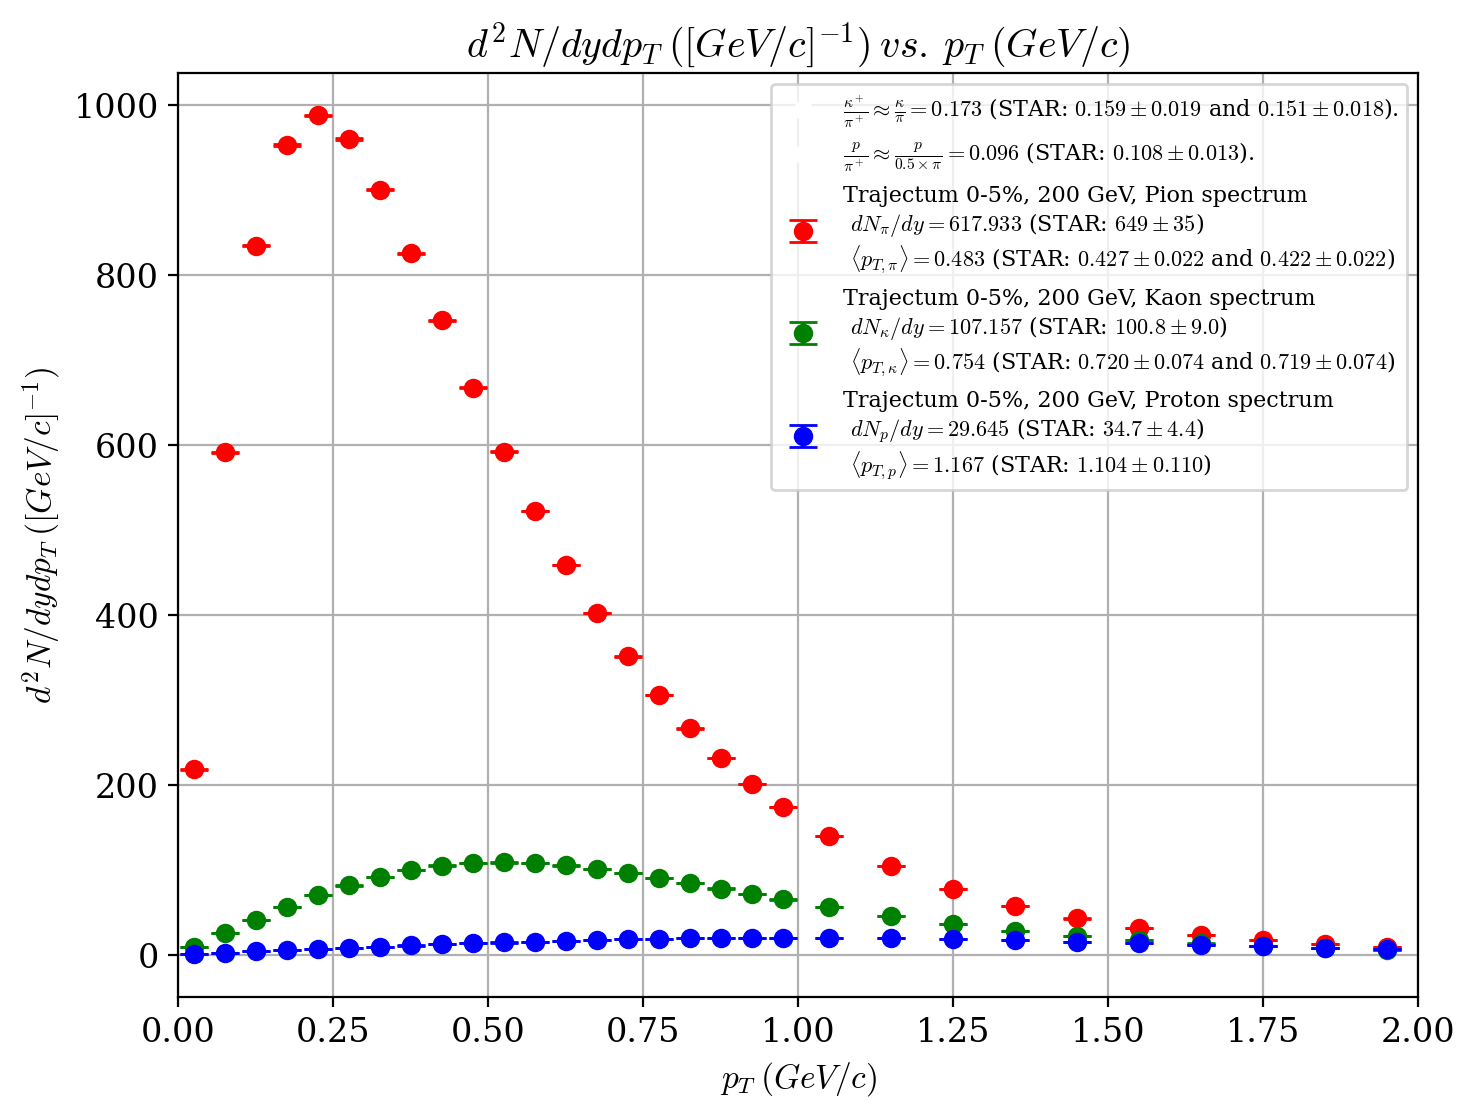

In [2]:

plt.rcParams.update({"text.usetex": False, "mathtext.fontset": "cm", 
                     "font.family": "serif", "font.size": 12})
plt.figure(figsize=(8, 6), dpi=200)

bin_widths2 = np.diff(xdata2)
bin_widths3 = np.diff(xdata3)
bin_widths4 = np.diff(xdata4)

dNdy_pi = np.sum(bin_widths2 * yield_values2[:-1])
dNdy_k = np.sum(bin_widths3 * yield_values3[:-1])
dNdy_p = np.sum(bin_widths4 * yield_values4[:-1])

pi_meanpt_05 = float(pi_meanpt[index])
k_meanpt_05 = float(k_meanpt[index])
p_meanpt_05 = float(p_meanpt[index])

if index == 20: #0-5%
    STARpidNdy = "649\pm35"
    STARpiplusmeanpt = "0.427\pm0.022"
    STARpiminusmeanpt = "0.422\pm0.022"
    STARkdNdy = "100.8\pm9.0"
    STARkplusmeanpt = "0.720\pm0.074"
    STARkminusmeanpt = "0.719\pm0.074"
    STARpdNdy = "34.7\pm4.4"
    STARpmeanpt = "1.104\pm0.110"
    STARkplusoverpiplus = "0.159\pm0.019"
    STARkminusoverpiminus = "0.151\pm0.018"
    STARprotonoverpiplus = "0.108\pm0.013"
elif index == 21: #5-10%
    STARpidNdy = "518\pm28"
    STARpiplusmeanpt = "0.422\pm0.021"
    STARpiminusmeanpt = "0.418\pm0.021"
    STARkdNdy = "80.6\pm6.6"
    STARkplusmeanpt = "0.703\pm0.064"
    STARkminusmeanpt = "0.704\pm0.064"
    STARpdNdy = "28.2\pm3.3"
    STARpmeanpt = "1.071\pm0.098"
    STARkplusoverpiplus = "0.159\pm0.017"
    STARkminusoverpiminus = "0.153\pm0.017"
    STARprotonoverpiplus = "0.110\pm0.012"
elif index == 33: #10-20%
    STARpidNdy = "390\pm21"
    STARpiplusmeanpt = "0.421\pm0.021"
    STARpiminusmeanpt = "0.416\pm0.021"
    STARkdNdy = "58.7\pm4.5"
    STARkplusmeanpt = "0.681\pm0.055"
    STARkminusmeanpt = "0.680\pm0.055"
    STARpdNdy = "20.1\pm2.2"
    STARpmeanpt = "1.017\pm0.082"
    STARkplusoverpiplus = "0.155\pm0.016"
    STARkminusoverpiminus = "0.147\pm0.015"
    STARprotonoverpiplus = "0.104\pm0.011"
elif index == 34: #20-30%
    STARpidNdy = "271\pm14"
    STARpiplusmeanpt = "0.411\pm0.021"
    STARpiminusmeanpt = "0.408\pm0.021"
    STARkdNdy = "40.2\pm2.8"
    STARkplusmeanpt = "0.668\pm0.047"
    STARkminusmeanpt = "0.668\pm0.047"
    STARpdNdy = "14.4\pm1.4"
    STARpmeanpt = "0.989\pm0.071"
    STARkplusoverpiplus = "0.152\pm0.014"
    STARkminusoverpiminus = "0.145\pm0.013"
    STARprotonoverpiplus = "0.107\pm0.010"

kaonoverpi = dNdy_k / dNdy_pi
protonoverpi = dNdy_p / (dNdy_pi * 0.5)

plt.errorbar(pT_values2,yield_values2,yerr=[upperuncertainty_values_2[:],loweruncertainty_values_2[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Pion spectrum \n $dN_{{\pi}}/dy={dNdy_pi:.3f}$ (STAR: ${STARpidNdy}$) \n $\\langle p_{{T,\pi}}\\rangle={pi_meanpt_05:.3f}$ (STAR: ${STARpiplusmeanpt}$ and ${STARpiminusmeanpt}$)", color="red")
plt.errorbar(pT_values3,yield_values3,yerr=[upperuncertainty_values_3[:],loweruncertainty_values_3[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Kaon spectrum \n $dN_{{\kappa}}/dy={dNdy_k:.3f}$ (STAR: ${STARkdNdy}$) \n $\\langle p_{{T,\kappa}}\\rangle={k_meanpt_05:.3f}$ (STAR: ${STARkplusmeanpt}$ and ${STARkminusmeanpt}$)", color="green")
plt.errorbar(pT_values4,yield_values4,yerr=[upperuncertainty_values_4[:],loweruncertainty_values_4[:]], fmt="o", capsize=5,label=f"Trajectum {centrality_label}, 200 GeV, Proton spectrum \n $dN_{{p}}/dy={dNdy_p:.3f}$ (STAR: ${STARpdNdy}$) \n $\\langle p_{{T,p}}\\rangle={p_meanpt_05:.3f}$ (STAR: ${STARpmeanpt}$)", color="blue")
plt.scatter([],[],color="white",label=rf"$\frac{{\kappa^+}}{{\pi^+}}\approx \frac{{\kappa}}{{\pi}}={kaonoverpi:.3f}$ (STAR: ${STARkplusoverpiplus}$ and ${STARkminusoverpiminus}$).")
plt.scatter([],[],color="white",label=rf"$\frac{{p}}{{\pi^+}}\approx\frac{{p}}{{0.5\times\pi}}={protonoverpi:.3f}$ (STAR: ${STARprotonoverpiplus}$).")
plt.title("$d^2N/dy dp_T\>([GeV/c]^{-1}) \>vs.\> p_T \> (GeV/c)$")
plt.xlim([0,2])
plt.xlabel("$p_T\>(GeV/c)$")
plt.ylabel("$d^2N/dy dp_T\>([GeV/c]^{-1})$")
plt.legend(prop={'size': '8'})
#plt.yscale("log")
plt.grid()
plt.show()


In [45]:
pi_meanpt_05 = pi_meanpt[20]
pi_meanpt_05_uerr = pi_usigdata[20]
pi_meanpt_05_lerr = pi_lsigdata[20]
print(pi_meanpt_05)
print(pi_meanpt_05_lerr)
print(pi_meanpt_05_uerr)

[0.48253006]
[0.00016798]
[8.5070365e-05]
